Import Liberies


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model  import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error,mean_absolute_error
from pmdarima import auto_arima

In [2]:
plt.style.use("fivethirtyeight")

Get Data


In [3]:
dataSet=pd.read_csv('./AAPL (1).csv')
dataSet["Date"] = pd.to_datetime(dataSet["Date"], infer_datetime_format=True)
dataset = dataSet.set_index("Date")

C:\Users\Ben Saadia Mohamed\AppData\Local\Temp\ipykernel_4724\425923718.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataSet["Date"] = pd.to_datetime(dataSet["Date"], infer_datetime_format=True)


Filtter DataFrame

In [4]:
df=dataset["Close"]
df


Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-05    66.394997
2019-12-06    67.677498
2019-12-09    66.730003
2019-12-10    67.120003
2019-12-11    67.692497
Name: Close, Length: 1999, dtype: float64

Plotting Data

<Axes: title={'center': "AAPL 'Close'"}, xlabel='Date', ylabel='Close Price'>

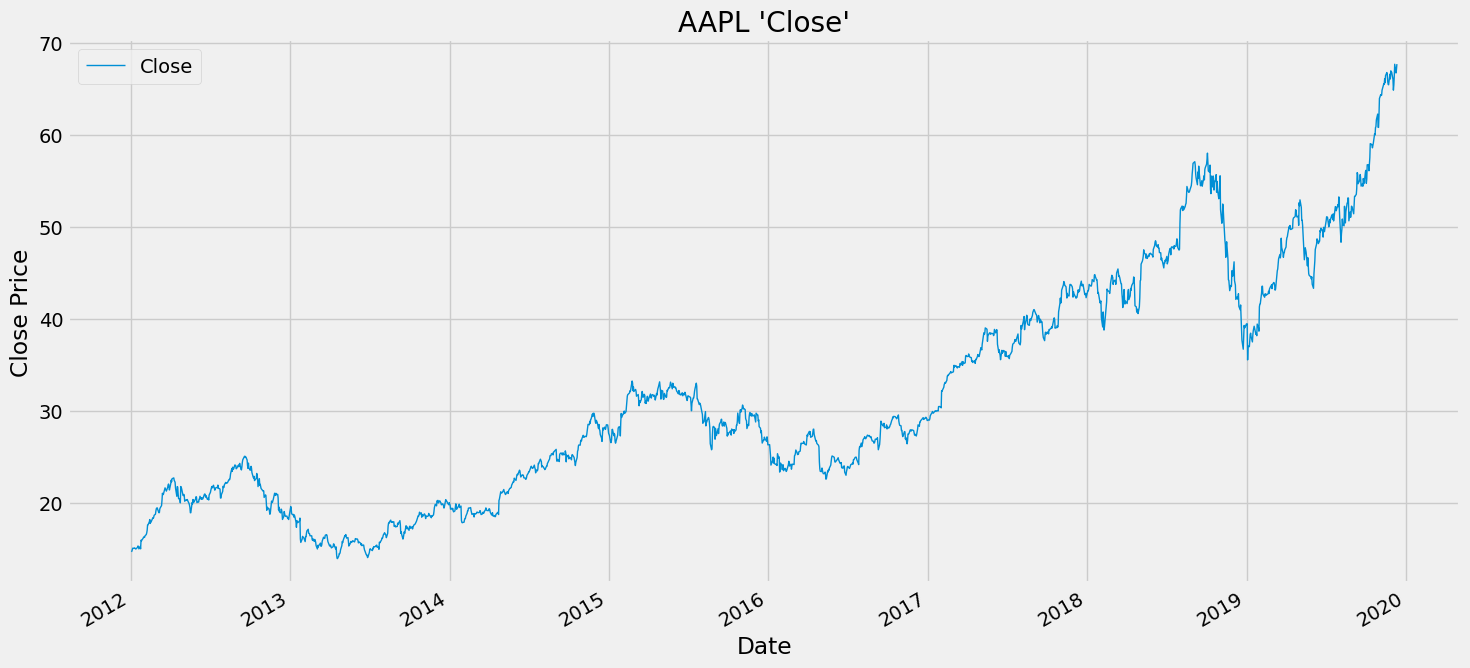

In [5]:
df.plot(figsize=(16,8),xlabel='Date',ylabel='Close Price',title="AAPL 'Close'",legend="Close",linewidth=1)

In [6]:
# decompose= seasonal_decompose(df,model='additive',period=1)
# decompose.plot()

Plot ACF & PACF

In [7]:
# Draw Plot
# fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
# plot_acf(df.values.tolist(), lags=20, ax=axes[0])
# plot_pacf(df.values.tolist(), lags=20, ax=axes[1])


Check For Stationarity

In [8]:
# dftest=adfuller(dataSet['Close'],autolag="AIC")
# print(f"1- ADF :{dftest[0]}")
# print(f"2- P-Value :{dftest[1]}")
# print(f"3- Num Of Lags : {dftest[2]}")
# print(f"Num Of Obs Used For ADF Reg And CVC : {dftest[3]}")
# print(f"Critical Values :")
# for key,val in dftest[4].items():
#     print(f"\t ,{key} : {val}")

Split Data into Training and Testing Data

In [9]:
# number of data train
num_data_train = math.floor(len(df)*.85)
# get x_train and x_test
train=df[:num_data_train]
test=df[num_data_train:]


Plot Train Data and Test Data

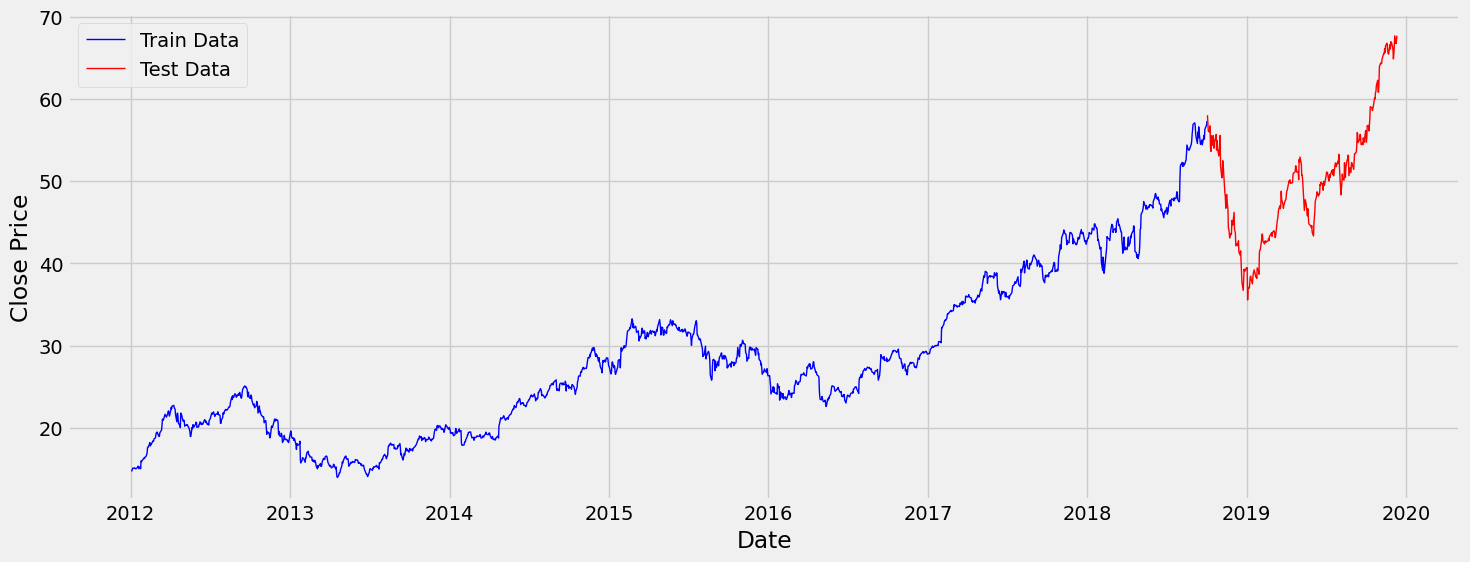

In [10]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(train,"blue",label="Train Data",linewidth=1)
plt.plot(test,"red",label="Test Data",linewidth=1)
plt.legend()
plt.show()

In [11]:
stepwise_fit=auto_arima(train,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1910.833, Time=10.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1916.484, Time=1.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1915.113, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1914.982, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1920.402, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1918.432, Time=5.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1918.647, Time=1.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1912.778, Time=7.88 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1912.923, Time=7.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1916.724, Time=1.91 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1919.618, Time=3.63 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1919.832, Time=3.21 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1914.743, Time=14.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1914.402, Time=2.64 sec

Best model:  ARIMA(2,1,2)(0,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1699
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -949.417
Date:                Mon, 24 Apr 2023   AIC                           1910.833
Time:                        16:07:22   BIC                           1943.456
Sample:                             0   HQIC                          1922.911
                               - 1699                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0735      0.031      2.340      0.019       0.012       0.135
ar.L1         -1.1555      0.091    -12.708      0.000      -1.334      -0.977
ar.L2         -0.7705      0.081     -9.480      0.000      -0.930      -0.611
ma.L1          1.2078      0.083     14.467      0.000       1.044       1.371
ma.L2          0.8224      0.072     11.473      0.000       0.682       0.963
sigma2         0.1791      0.004     50.151      0.000       0.172       0.186
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1212.05
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.17   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Prediction

In [13]:
prediction=[]
training_data=list(train)
testing_data=list(test)
n_test_obser=len(testing_data)
for n in range(n_test_obser):
    model=ARIMA(training_data,order=(2,1,2))
    model_fit=model.fit()
    # output=model_fit.predict()
    output=model_fit.forecast()
    prediction.append(output)
    training_data.append(testing_data[n])


        

c:\Users\Ben Saadia Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ben Saadia Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ben Saadia Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ben Saadia Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

In [14]:
data_range=test.index

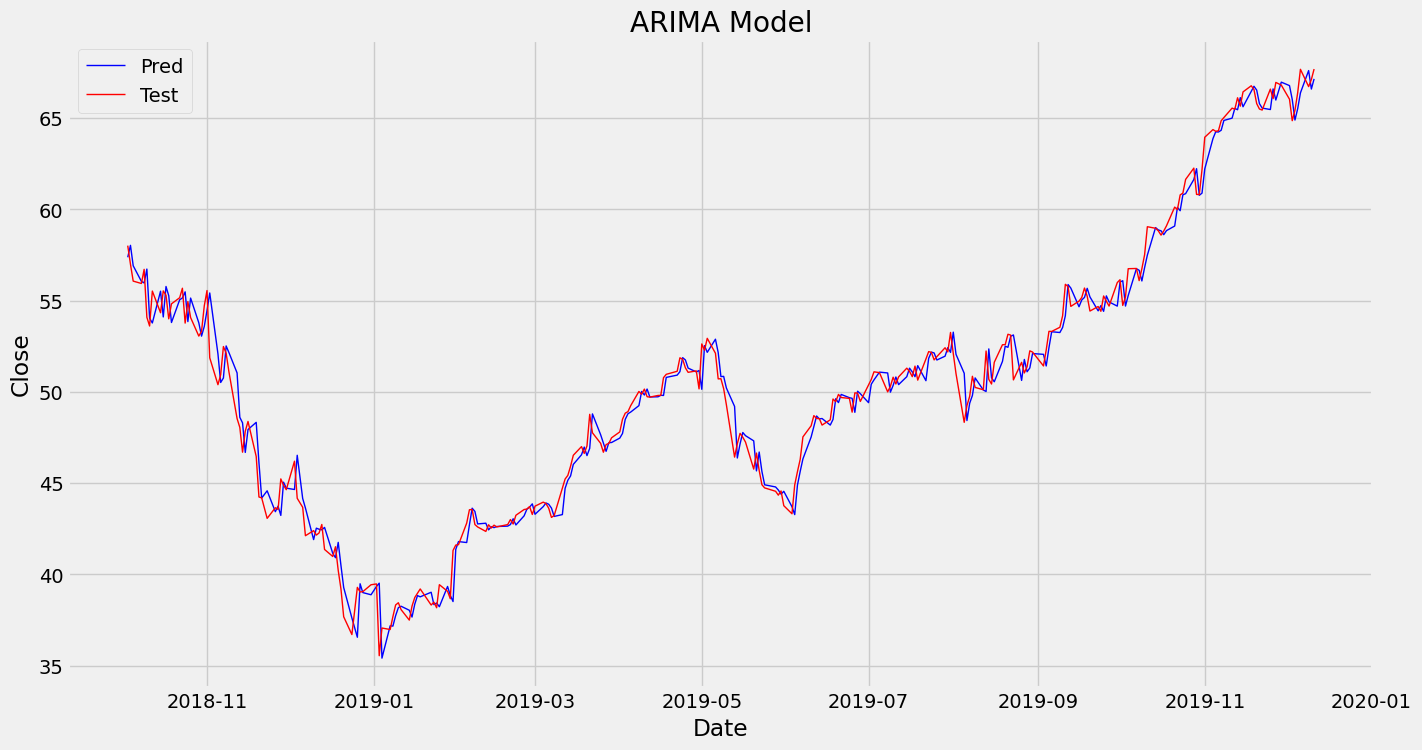

In [15]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.title("ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data_range,prediction,color="blue",label="Pred",linewidth=1)
plt.plot(data_range,testing_data,color="red",label="Test",linewidth=1)
plt.legend()
plt.show()


In [16]:
print(f"MAE : {mean_absolute_error(testing_data,prediction)}")
print(f"MSE : {mean_squared_error(testing_data,prediction)}")

MAE : 0.6808347352895474
MSE : 0.8687878881292739
